In [28]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
import numpy as np
import scipy.stats as sp
from scipy.integrate import simpson
from scipy.linalg import  cholesky
import matplotlib.pyplot as plt
#%matplotlib widget

# Control flags
labelsize = 14
titlesize = 16
suptitlesize = 18

In [29]:
def plot2dcov(mean, cov, k, n=30, picture_n=0, color='blue', xytext=(0, 0)):
  """Plots the 2d contour

  Args:
    mean -  Distribution mean
    cov  -  Distribution covariance matrix
    k    -  iso-counter value (Radius of the corresponded circle) (1, 2, 3, "all")
    n    -  Number of points to calculate

  Returns:
    plot - Plot of the ellipsoid corresponded to the sigma-level k

  """
  # Check k value
  assert (k == 1 or k == 2 or k == 3 or k == "all"), f'Check the value k! You put k={k}. Possible values of k:(1, 2, 3, "all")'

  # Check cov matrix
  assert np.shape(cov) == (2, 2), f"Covariance matrix should have a (2,2) shape form. You put {np.shape(cov)} shape form."
  assert (cov[0,0]) >= 0 and (cov[1,1]) >= 0, f"Covariance matrix matrix should be positively defined. You put cov={cov}"

  # Check mean
  assert len(mean) == 2, f"Mean vector should have only 2 values. You put {len(mean)} values."

  # Get the lower-case triangular matrix form Cholesky decomposition
  L = cholesky(cov, lower=True)

  if k != "all":
    # Generate an array of coordinates of the circle for the N(x, 0, 1)
    t = np.linspace(0, 2*np.pi, n)
    x =  k * np.cos(t)
    y =  k * np.sin(t)

    # Transpose the circle accordingly the covariance
    coords = L @ np.array((x,y))
    coords[0] += mean[0]
    coords[1] += mean[1]

    # Plot figure
    #fig = plt.figure(figsize=[6.4*3, 4.8*3])
    #ax = fig.add_subplot(111)
    #plt.plot(x,y)
    ax = plt.subplot()
    ax.plot(coords[0], coords[1], linewidth=3, color=color)
    ax.plot(mean[0], mean[1], marker='o')
    ax.annotate(f'$\mu=({mean[0]:2.2f}, {mean[1]:2.2f})$', xy=(mean[0], mean[1]),  xycoords='data',
            xytext=xytext, fontsize=labelsize)
    ax.grid(True)
    ax.set_title(f'Picture {picture_n}. 2D Gaussian ISO-countour for k={k}', fontsize=titlesize)
    ax.set_xlabel('X', fontsize=labelsize)
    ax.set_ylabel('Y', fontsize=labelsize)
    # Set axis equality scale
    ax.set_aspect('equal')
    #plt.show()

  else:
    # Generate an array of coordinates of the circle for the N(x, 0, 1)
    t = np.linspace(0, 2*np.pi, n)
    coords = np.zeros((3, 2, n))
    for i in range(3):
      x = (i+1) * np.cos(t)
      y = (i+1) * np.sin(t)

      # Transpose the circle accordingly the covariance
      coords[i] = L @ np.array((x,y))
      coords[i, 0] += mean[0]
      coords[i, 1] += mean[1]

    # Plot figure
    #fig = plt.figure(figsize=[6.4*3, 4.8*3])
    ax = plt.subplot()
    ax.plot(coords[0, 0], coords[0, 1], linewidth=3, color='red', label=r'$k=1$')
    ax.plot(coords[1, 0], coords[1, 1], linewidth=3, color='blue', label=r'$k=2$')
    ax.plot(coords[2, 0], coords[2, 1], linewidth=3, color='green', label=r'$k=3$')
    #plt.plot(x+mean[0],y+mean[1]) 
    ax.plot(mean[0], mean[1], marker='o')
    ax.annotate(f'$\mu=({mean[0]}, {mean[1]})$', xy=(mean[0], mean[1]),  xycoords='data',
            xytext=xytext, fontsize=labelsize)
    ax.grid(True)
    ax.set_title(f'Picture {picture_n}. 2D Gaussian ISO-countours', fontsize=titlesize)
    ax.set_xlabel('X', fontsize=labelsize)
    ax.set_ylabel('Y', fontsize=labelsize)
    ax.legend(loc='upper right', fontsize=labelsize)
    # Set axis equality scale
    ax.set_aspect('equal')
    #plt.show()
  return ax

In [30]:
def sample_2d_gaussian(mean, cov, n):
    """ Function returns 2D sample array with defined mean and cov

    Args: 
        mean - Distribution mean
        cov - Distribution covariance
        n - amount of samples

    Returns:
        y - Resulted array of points [x, y] n samples
    """
    # 1. Sample from x~N(0, I)
    x = np.random.randn(2, n)

    # 2. Find b=mu_y
    b = np.copy(mean)

    # 3. Find A : A * A^T = cov_y
    A = cholesky(cov, lower=True)

    # 4. Make affine transforamtion y = Ax + b
    y = np.array([A @ x[:, i] + b for i in range(n)])
    
    return y

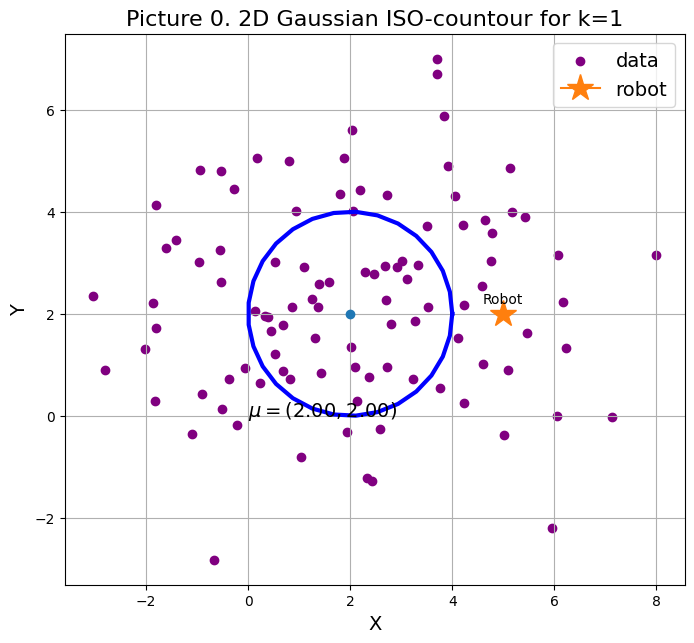

Eucledian distance 3.0
Mahalanobis distance 1.5


In [108]:
# Distribution parameters
mean = np.array((2, 2))
cov = np.array(((4, 0), (0, 4)))

y1 = sample_2d_gaussian(mean, cov, 100)

# Draw scatter plot of the data and 1-k isocountour
plt.figure(figsize=[8, 8])
plot2dcov(mean, cov, 1, picture_n=0)
plt.scatter(y1[:, 0], y1[:, 1], color='purple', label='data')

# Plot robot
pos = np.array([5, 2])
plt.plot(pos[0], pos[1], marker="*", markersize=20,label='robot')
plt.annotate("Robot", pos + np.array([0, 0.2]), ha='center')

plt.legend(loc='upper right', fontsize=labelsize)
plt.show()

# Euclidean distance
print("Eucledian distance", np.linalg.norm(pos-mean))
print("Mahalanobis distance", np.sqrt((pos-mean).T @ np.linalg.inv(cov) @ (pos-mean)))


In [142]:
# test on covariance
cov = np.array([[0.2, 0],
                [0, 0.2]])
cov * 1.03 ** 26

array([[0.43131825, 0.        ],
       [0.        , 0.43131825]])

In [95]:
# Test on 3-d matrix multiplication
robot_position = np.tile(np.array([-1.2080612118181775, -0.012764498469866988]), (7, 1))
pedestrian_predicted_positions = np.array([[[ 1.18796456e+00, -5.12715638e-01],
        [ 1.51404240e-01, -1.14245433e+00],
        [ 1.59583384e-01,  7.08692956e-01],
        [ 4.14221951e-01,  2.18009124e-01],
        [-8.87617826e-01, -9.60696757e-01],
        [-3.69704772e-02, -1.76776182e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[ 1.08844936e+00, -5.02880759e-01],
        [ 1.48461313e-01, -1.04249764e+00],
        [ 1.56196206e-01,  6.08750337e-01],
        [ 3.41334902e-01,  1.49543965e-01],
        [-8.17600552e-01, -8.89299409e-01],
        [-1.05019641e-01, -1.03500598e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[ 9.88934157e-01, -4.93045881e-01],
        [ 1.45518386e-01, -9.42540958e-01],
        [ 1.52809028e-01,  5.08807718e-01],
        [ 2.68447852e-01,  8.10788059e-02],
        [-7.47583278e-01, -8.17902060e-01],
        [-1.73068806e-01, -3.02250137e-02],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[ 8.89418956e-01, -4.83211003e-01],
        [ 1.42575460e-01, -8.42584271e-01],
        [ 1.49421850e-01,  4.08865100e-01],
        [ 1.95560803e-01,  1.26136467e-02],
        [-6.77566004e-01, -7.46504712e-01],
        [-2.41117970e-01,  4.30505706e-02],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[ 7.89903756e-01, -4.73376125e-01],
        [ 1.39632533e-01, -7.42627585e-01],
        [ 1.46034672e-01,  3.08922481e-01],
        [ 1.22673754e-01, -5.58515126e-02],
        [-6.07548730e-01, -6.75107364e-01],
        [-3.09167134e-01,  1.16326155e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[ 6.90388555e-01, -4.63541247e-01],
        [ 1.36689606e-01, -6.42670898e-01],
        [ 1.42647494e-01,  2.08979862e-01],
        [ 4.97867043e-02, -1.24316672e-01],
        [-5.37531456e-01, -6.03710016e-01],
        [-3.77216298e-01,  1.89601739e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[ 5.90873354e-01, -4.53706368e-01],
        [ 1.33746680e-01, -5.42714212e-01],
        [ 1.39260316e-01,  1.09037244e-01],
        [-2.31003451e-02, -1.92781831e-01],
        [-4.67514182e-01, -5.32312668e-01],
        [-4.45265462e-01,  2.62877324e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[ 4.91358154e-01, -4.43871490e-01],
        [ 1.30803753e-01, -4.42757525e-01],
        [ 1.35873138e-01,  9.09462491e-03],
        [-9.59873944e-02, -2.61246990e-01],
        [-3.97496908e-01, -4.60915319e-01],
        [-5.13314626e-01,  3.36152908e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[ 3.91842953e-01, -4.34036612e-01],
        [ 1.27860826e-01, -3.42800839e-01],
        [ 1.32485960e-01, -9.08479938e-02],
        [-1.68874444e-01, -3.29712150e-01],
        [-3.27479634e-01, -3.89517971e-01],
        [-5.81363791e-01,  4.09428492e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[ 2.92327752e-01, -4.24201734e-01],
        [ 1.24917899e-01, -2.42844152e-01],
        [ 1.29098782e-01, -1.90790612e-01],
        [-2.41761493e-01, -3.98177309e-01],
        [-2.57462360e-01, -3.18120623e-01],
        [-6.49412955e-01,  4.82704076e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[ 1.92812552e-01, -4.14366856e-01],
        [ 1.21974973e-01, -1.42887466e-01],
        [ 1.25711604e-01, -2.90733231e-01],
        [-3.14648543e-01, -4.66642468e-01],
        [-1.87445086e-01, -2.46723275e-01],
        [-7.17462119e-01,  5.55979661e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[ 9.32973509e-02, -4.04531977e-01],
        [ 1.19032046e-01, -4.29307790e-02],
        [ 1.22324426e-01, -3.90675850e-01],
        [-3.87535592e-01, -5.35107628e-01],
        [-1.17427812e-01, -1.75325926e-01],
        [-7.85511283e-01,  6.29255245e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-6.21784981e-03, -3.94697099e-01],
        [ 1.16089119e-01,  5.70259075e-02],
        [ 1.18937248e-01, -4.90618468e-01],
        [-4.60422641e-01, -6.03572787e-01],
        [-4.74105376e-02, -1.03928578e-01],
        [-8.53560447e-01,  7.02530829e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-1.05733051e-01, -3.84862221e-01],
        [ 1.13146193e-01,  1.56982594e-01],
        [ 1.15550070e-01, -5.90561087e-01],
        [-5.33309691e-01, -6.72037946e-01],
        [ 2.26067364e-02, -3.25312301e-02],
        [-9.21609611e-01,  7.75806414e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-2.05248251e-01, -3.75027343e-01],
        [ 1.10203266e-01,  2.56939281e-01],
        [ 1.12162892e-01, -6.90503706e-01],
        [-6.06196740e-01, -7.40503105e-01],
        [ 9.26240105e-02,  3.88661181e-02],
        [-9.89658776e-01,  8.49081998e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-3.04763452e-01, -3.65192465e-01],
        [ 1.07260339e-01,  3.56895967e-01],
        [ 1.08775714e-01, -7.90446324e-01],
        [-6.79083789e-01, -8.08968265e-01],
        [ 1.62641285e-01,  1.10263466e-01],
        [-1.05770794e+00,  9.22357582e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-4.04278653e-01, -3.55357586e-01],
        [ 1.04317413e-01,  4.56852654e-01],
        [ 1.05388536e-01, -8.90388943e-01],
        [-7.51970839e-01, -8.77433424e-01],
        [ 2.32658559e-01,  1.81660815e-01],
        [-1.12575710e+00,  9.95633167e-01],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-5.03793853e-01, -3.45522708e-01],
        [ 1.01374486e-01,  5.56809340e-01],
        [ 1.02001358e-01, -9.90331562e-01],
        [-8.24857888e-01, -9.45898583e-01],
        [ 3.02675833e-01,  2.53058163e-01],
        [-1.19380627e+00,  1.06890875e+00],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-6.03309054e-01, -3.35687830e-01],
        [ 9.84315592e-02,  6.56766027e-01],
        [ 9.86141799e-02, -1.09027418e+00],
        [-8.97744937e-01, -1.01436374e+00],
        [ 3.72693107e-01,  3.24455511e-01],
        [-1.26185543e+00,  1.14218434e+00],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-7.02824255e-01, -3.25852952e-01],
        [ 9.54886325e-02,  7.56722713e-01],
        [ 9.52270018e-02, -1.19021680e+00],
        [-9.70631987e-01, -1.08282890e+00],
        [ 4.42710381e-01,  3.95852859e-01],
        [-1.32990460e+00,  1.21545992e+00],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-8.02339455e-01, -3.16018074e-01],
        [ 9.25457058e-02,  8.56679400e-01],
        [ 9.18398238e-02, -1.29015942e+00],
        [-1.04351904e+00, -1.15129406e+00],
        [ 5.12727655e-01,  4.67250207e-01],
        [-1.39795376e+00,  1.28873550e+00],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-9.01854656e-01, -3.06183195e-01],
        [ 8.96027791e-02,  9.56636086e-01],
        [ 8.84526458e-02, -1.39010204e+00],
        [-1.11640609e+00, -1.21975922e+00],
        [ 5.82744929e-01,  5.38647556e-01],
        [-1.46600292e+00,  1.36201109e+00],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-1.00136986e+00, -2.96348317e-01],
        [ 8.66598524e-02,  1.05659277e+00],
        [ 8.50654677e-02, -1.49004466e+00],
        [-1.18929313e+00, -1.28822438e+00],
        [ 6.52762203e-01,  6.10044904e-01],
        [-1.53405209e+00,  1.43528667e+00],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-1.10088506e+00, -2.86513439e-01],
        [ 8.37169257e-02,  1.15654946e+00],
        [ 8.16782897e-02, -1.58998727e+00],
        [-1.26218018e+00, -1.35668954e+00],
        [ 7.22779477e-01,  6.81442252e-01],
        [-1.60210125e+00,  1.50856226e+00],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-1.20040026e+00, -2.76678561e-01],
        [ 8.07739990e-02,  1.25650615e+00],
        [ 7.82911117e-02, -1.68992989e+00],
        [-1.33506723e+00, -1.42515470e+00],
        [ 7.92796751e-01,  7.52839600e-01],
        [-1.67015042e+00,  1.58183784e+00],
        [ 1.00000000e+04,  1.00000000e+04]],

       [[-1.29991546e+00, -2.66843682e-01],
        [ 7.78310723e-02,  1.35646283e+00],
        [ 7.49039336e-02, -1.78987251e+00],
        [-1.40795428e+00, -1.49361986e+00],
        [ 8.62814025e-01,  8.24236948e-01],
        [-1.73819958e+00,  1.65511343e+00],
        [ 1.00000000e+04,  1.00000000e+04]]])

       
pedestrian_predicted_covariances = np.array([[[[1.        , 0.        ],
         [0.        , 1.        ]],

        [[1.        , 0.        ],
         [0.        , 1.        ]],

        [[1.        , 0.        ],
         [0.        , 1.        ]],

        [[1.        , 0.        ],
         [0.        , 1.        ]],

        [[1.        , 0.        ],
         [0.        , 1.        ]],

        [[1.        , 0.        ],
         [0.        , 1.        ]],

        [[1.        , 0.        ],
         [0.        , 1.        ]]],


       [[[1.06      , 0.        ],
         [0.        , 1.06      ]],

        [[1.06      , 0.        ],
         [0.        , 1.06      ]],

        [[1.06      , 0.        ],
         [0.        , 1.06      ]],

        [[1.06      , 0.        ],
         [0.        , 1.06      ]],

        [[1.06      , 0.        ],
         [0.        , 1.06      ]],

        [[1.06      , 0.        ],
         [0.        , 1.06      ]],

        [[1.06      , 0.        ],
         [0.        , 1.06      ]]],


       [[[1.1236    , 0.        ],
         [0.        , 1.1236    ]],

        [[1.1236    , 0.        ],
         [0.        , 1.1236    ]],

        [[1.1236    , 0.        ],
         [0.        , 1.1236    ]],

        [[1.1236    , 0.        ],
         [0.        , 1.1236    ]],

        [[1.1236    , 0.        ],
         [0.        , 1.1236    ]],

        [[1.1236    , 0.        ],
         [0.        , 1.1236    ]],

        [[1.1236    , 0.        ],
         [0.        , 1.1236    ]]],


       [[[1.191016  , 0.        ],
         [0.        , 1.191016  ]],

        [[1.191016  , 0.        ],
         [0.        , 1.191016  ]],

        [[1.191016  , 0.        ],
         [0.        , 1.191016  ]],

        [[1.191016  , 0.        ],
         [0.        , 1.191016  ]],

        [[1.191016  , 0.        ],
         [0.        , 1.191016  ]],

        [[1.191016  , 0.        ],
         [0.        , 1.191016  ]],

        [[1.191016  , 0.        ],
         [0.        , 1.191016  ]]],


       [[[1.26247696, 0.        ],
         [0.        , 1.26247696]],

        [[1.26247696, 0.        ],
         [0.        , 1.26247696]],

        [[1.26247696, 0.        ],
         [0.        , 1.26247696]],

        [[1.26247696, 0.        ],
         [0.        , 1.26247696]],

        [[1.26247696, 0.        ],
         [0.        , 1.26247696]],

        [[1.26247696, 0.        ],
         [0.        , 1.26247696]],

        [[1.26247696, 0.        ],
         [0.        , 1.26247696]]],


       [[[1.33822558, 0.        ],
         [0.        , 1.33822558]],

        [[1.33822558, 0.        ],
         [0.        , 1.33822558]],

        [[1.33822558, 0.        ],
         [0.        , 1.33822558]],

        [[1.33822558, 0.        ],
         [0.        , 1.33822558]],

        [[1.33822558, 0.        ],
         [0.        , 1.33822558]],

        [[1.33822558, 0.        ],
         [0.        , 1.33822558]],

        [[1.33822558, 0.        ],
         [0.        , 1.33822558]]],


       [[[1.41851911, 0.        ],
         [0.        , 1.41851911]],

        [[1.41851911, 0.        ],
         [0.        , 1.41851911]],

        [[1.41851911, 0.        ],
         [0.        , 1.41851911]],

        [[1.41851911, 0.        ],
         [0.        , 1.41851911]],

        [[1.41851911, 0.        ],
         [0.        , 1.41851911]],

        [[1.41851911, 0.        ],
         [0.        , 1.41851911]],

        [[1.41851911, 0.        ],
         [0.        , 1.41851911]]],


       [[[1.50363026, 0.        ],
         [0.        , 1.50363026]],

        [[1.50363026, 0.        ],
         [0.        , 1.50363026]],

        [[1.50363026, 0.        ],
         [0.        , 1.50363026]],

        [[1.50363026, 0.        ],
         [0.        , 1.50363026]],

        [[1.50363026, 0.        ],
         [0.        , 1.50363026]],

        [[1.50363026, 0.        ],
         [0.        , 1.50363026]],

        [[1.50363026, 0.        ],
         [0.        , 1.50363026]]],


       [[[1.59384807, 0.        ],
         [0.        , 1.59384807]],

        [[1.59384807, 0.        ],
         [0.        , 1.59384807]],

        [[1.59384807, 0.        ],
         [0.        , 1.59384807]],

        [[1.59384807, 0.        ],
         [0.        , 1.59384807]],

        [[1.59384807, 0.        ],
         [0.        , 1.59384807]],

        [[1.59384807, 0.        ],
         [0.        , 1.59384807]],

        [[1.59384807, 0.        ],
         [0.        , 1.59384807]]],


       [[[1.68947896, 0.        ],
         [0.        , 1.68947896]],

        [[1.68947896, 0.        ],
         [0.        , 1.68947896]],

        [[1.68947896, 0.        ],
         [0.        , 1.68947896]],

        [[1.68947896, 0.        ],
         [0.        , 1.68947896]],

        [[1.68947896, 0.        ],
         [0.        , 1.68947896]],

        [[1.68947896, 0.        ],
         [0.        , 1.68947896]],

        [[1.68947896, 0.        ],
         [0.        , 1.68947896]]],


       [[[1.7908477 , 0.        ],
         [0.        , 1.7908477 ]],

        [[1.7908477 , 0.        ],
         [0.        , 1.7908477 ]],

        [[1.7908477 , 0.        ],
         [0.        , 1.7908477 ]],

        [[1.7908477 , 0.        ],
         [0.        , 1.7908477 ]],

        [[1.7908477 , 0.        ],
         [0.        , 1.7908477 ]],

        [[1.7908477 , 0.        ],
         [0.        , 1.7908477 ]],

        [[1.7908477 , 0.        ],
         [0.        , 1.7908477 ]]],


       [[[1.89829856, 0.        ],
         [0.        , 1.89829856]],

        [[1.89829856, 0.        ],
         [0.        , 1.89829856]],

        [[1.89829856, 0.        ],
         [0.        , 1.89829856]],

        [[1.89829856, 0.        ],
         [0.        , 1.89829856]],

        [[1.89829856, 0.        ],
         [0.        , 1.89829856]],

        [[1.89829856, 0.        ],
         [0.        , 1.89829856]],

        [[1.89829856, 0.        ],
         [0.        , 1.89829856]]],


       [[[2.01219647, 0.        ],
         [0.        , 2.01219647]],

        [[2.01219647, 0.        ],
         [0.        , 2.01219647]],

        [[2.01219647, 0.        ],
         [0.        , 2.01219647]],

        [[2.01219647, 0.        ],
         [0.        , 2.01219647]],

        [[2.01219647, 0.        ],
         [0.        , 2.01219647]],

        [[2.01219647, 0.        ],
         [0.        , 2.01219647]],

        [[2.01219647, 0.        ],
         [0.        , 2.01219647]]],


       [[[2.13292826, 0.        ],
         [0.        , 2.13292826]],

        [[2.13292826, 0.        ],
         [0.        , 2.13292826]],

        [[2.13292826, 0.        ],
         [0.        , 2.13292826]],

        [[2.13292826, 0.        ],
         [0.        , 2.13292826]],

        [[2.13292826, 0.        ],
         [0.        , 2.13292826]],

        [[2.13292826, 0.        ],
         [0.        , 2.13292826]],

        [[2.13292826, 0.        ],
         [0.        , 2.13292826]]],


       [[[2.26090396, 0.        ],
         [0.        , 2.26090396]],

        [[2.26090396, 0.        ],
         [0.        , 2.26090396]],

        [[2.26090396, 0.        ],
         [0.        , 2.26090396]],

        [[2.26090396, 0.        ],
         [0.        , 2.26090396]],

        [[2.26090396, 0.        ],
         [0.        , 2.26090396]],

        [[2.26090396, 0.        ],
         [0.        , 2.26090396]],

        [[2.26090396, 0.        ],
         [0.        , 2.26090396]]],


       [[[2.39655819, 0.        ],
         [0.        , 2.39655819]],

        [[2.39655819, 0.        ],
         [0.        , 2.39655819]],

        [[2.39655819, 0.        ],
         [0.        , 2.39655819]],

        [[2.39655819, 0.        ],
         [0.        , 2.39655819]],

        [[2.39655819, 0.        ],
         [0.        , 2.39655819]],

        [[2.39655819, 0.        ],
         [0.        , 2.39655819]],

        [[2.39655819, 0.        ],
         [0.        , 2.39655819]]],


       [[[2.54035168, 0.        ],
         [0.        , 2.54035168]],

        [[2.54035168, 0.        ],
         [0.        , 2.54035168]],

        [[2.54035168, 0.        ],
         [0.        , 2.54035168]],

        [[2.54035168, 0.        ],
         [0.        , 2.54035168]],

        [[2.54035168, 0.        ],
         [0.        , 2.54035168]],

        [[2.54035168, 0.        ],
         [0.        , 2.54035168]],

        [[2.54035168, 0.        ],
         [0.        , 2.54035168]]],


       [[[2.69277279, 0.        ],
         [0.        , 2.69277279]],

        [[2.69277279, 0.        ],
         [0.        , 2.69277279]],

        [[2.69277279, 0.        ],
         [0.        , 2.69277279]],

        [[2.69277279, 0.        ],
         [0.        , 2.69277279]],

        [[2.69277279, 0.        ],
         [0.        , 2.69277279]],

        [[2.69277279, 0.        ],
         [0.        , 2.69277279]],

        [[2.69277279, 0.        ],
         [0.        , 2.69277279]]],


       [[[2.85433915, 0.        ],
         [0.        , 2.85433915]],

        [[2.85433915, 0.        ],
         [0.        , 2.85433915]],

        [[2.85433915, 0.        ],
         [0.        , 2.85433915]],

        [[2.85433915, 0.        ],
         [0.        , 2.85433915]],

        [[2.85433915, 0.        ],
         [0.        , 2.85433915]],

        [[2.85433915, 0.        ],
         [0.        , 2.85433915]],

        [[2.85433915, 0.        ],
         [0.        , 2.85433915]]],


       [[[3.0255995 , 0.        ],
         [0.        , 3.0255995 ]],

        [[3.0255995 , 0.        ],
         [0.        , 3.0255995 ]],

        [[3.0255995 , 0.        ],
         [0.        , 3.0255995 ]],

        [[3.0255995 , 0.        ],
         [0.        , 3.0255995 ]],

        [[3.0255995 , 0.        ],
         [0.        , 3.0255995 ]],

        [[3.0255995 , 0.        ],
         [0.        , 3.0255995 ]],

        [[3.0255995 , 0.        ],
         [0.        , 3.0255995 ]]],


       [[[3.20713547, 0.        ],
         [0.        , 3.20713547]],

        [[3.20713547, 0.        ],
         [0.        , 3.20713547]],

        [[3.20713547, 0.        ],
         [0.        , 3.20713547]],

        [[3.20713547, 0.        ],
         [0.        , 3.20713547]],

        [[3.20713547, 0.        ],
         [0.        , 3.20713547]],

        [[3.20713547, 0.        ],
         [0.        , 3.20713547]],

        [[3.20713547, 0.        ],
         [0.        , 3.20713547]]],


       [[[3.3995636 , 0.        ],
         [0.        , 3.3995636 ]],

        [[3.3995636 , 0.        ],
         [0.        , 3.3995636 ]],

        [[3.3995636 , 0.        ],
         [0.        , 3.3995636 ]],

        [[3.3995636 , 0.        ],
         [0.        , 3.3995636 ]],

        [[3.3995636 , 0.        ],
         [0.        , 3.3995636 ]],

        [[3.3995636 , 0.        ],
         [0.        , 3.3995636 ]],

        [[3.3995636 , 0.        ],
         [0.        , 3.3995636 ]]],


       [[[3.60353742, 0.        ],
         [0.        , 3.60353742]],

        [[3.60353742, 0.        ],
         [0.        , 3.60353742]],

        [[3.60353742, 0.        ],
         [0.        , 3.60353742]],

        [[3.60353742, 0.        ],
         [0.        , 3.60353742]],

        [[3.60353742, 0.        ],
         [0.        , 3.60353742]],

        [[3.60353742, 0.        ],
         [0.        , 3.60353742]],

        [[3.60353742, 0.        ],
         [0.        , 3.60353742]]],


       [[[3.81974966, 0.        ],
         [0.        , 3.81974966]],

        [[3.81974966, 0.        ],
         [0.        , 3.81974966]],

        [[3.81974966, 0.        ],
         [0.        , 3.81974966]],

        [[3.81974966, 0.        ],
         [0.        , 3.81974966]],

        [[3.81974966, 0.        ],
         [0.        , 3.81974966]],

        [[3.81974966, 0.        ],
         [0.        , 3.81974966]],

        [[3.81974966, 0.        ],
         [0.        , 3.81974966]]],


       [[[4.04893464, 0.        ],
         [0.        , 4.04893464]],

        [[4.04893464, 0.        ],
         [0.        , 4.04893464]],

        [[4.04893464, 0.        ],
         [0.        , 4.04893464]],

        [[4.04893464, 0.        ],
         [0.        , 4.04893464]],

        [[4.04893464, 0.        ],
         [0.        , 4.04893464]],

        [[4.04893464, 0.        ],
         [0.        , 4.04893464]],

        [[4.04893464, 0.        ],
         [0.        , 4.04893464]]],


       [[[4.29187072, 0.        ],
         [0.        , 4.29187072]],

        [[4.29187072, 0.        ],
         [0.        , 4.29187072]],

        [[4.29187072, 0.        ],
         [0.        , 4.29187072]],

        [[4.29187072, 0.        ],
         [0.        , 4.29187072]],

        [[4.29187072, 0.        ],
         [0.        , 4.29187072]],

        [[4.29187072, 0.        ],
         [0.        , 4.29187072]],

        [[4.29187072, 0.        ],
         [0.        , 4.29187072]]]])
         
robot_predicted_trajectory = np.array([[-4.00000000e+00,  0.00000000e+00],
       [-3.80000000e+00, -1.57082523e-37],
       [-3.60000000e+00,  2.30394937e-12],
       [-3.39999999e+00,  3.44601304e-12],
       [-3.19999999e+00,  3.84095113e-12],
       [-2.99999999e+00,  5.33408236e-12],
       [-2.79999999e+00,  6.33744821e-12],
       [-2.59999999e+00,  7.20505383e-12],
       [-2.39999998e+00,  8.02686666e-12],
       [-2.19999998e+00,  8.76582874e-12],
       [-1.99999998e+00,  9.41991595e-12],
       [-1.79999998e+00,  9.98978780e-12],
       [-1.59999998e+00,  1.04752420e-11],
       [-1.39999997e+00,  1.08765457e-11],
       [-1.19999997e+00,  1.11938258e-11],
       [-9.99999971e-01,  1.14265385e-11],
       [-7.99999969e-01,  1.15755356e-11],
       [-5.99999967e-01,  1.16401305e-11],
       [-3.99999965e-01,  1.16224261e-11],
       [-1.99999963e-01,  1.15254459e-11],
       [ 3.86619718e-08,  1.13310530e-11],
       [ 2.00000041e-01,  1.07690019e-11],
       [ 4.00000043e-01,  1.14012568e-11],
       [ 6.00000044e-01,  9.81331763e-12],
       [ 8.00000046e-01,  9.58874132e-12],
       [ 1.00000005e+00,  9.12550171e-12]])

In [103]:
# шаг предсказания 0
dx_dy_difference_robot_pedesttians = 0
pedestrian_predicted_covariances[0, :, :, :] # Это ковариации для всех пешеходов на шаге 0
pedestrian_predicted_positions[0, :, :] # Это позиции пешеходов в нулевой момент времени, то есть их граунд-труф
robot_position # Это позиция робота расширенная до размерности пешеходов

S = 0
for k in range(26): # для каждого шага
    robot_position = np.tile(robot_predicted_trajectory[k], (7, 1))
    dx_dy_robot_pedestrians = robot_position - pedestrian_predicted_positions[0, :, :]
    print(f"Step {k}")
    print("#########################################################")
    for i in range(7): # суммируем дистанцию каждого пешехода
        mah_dist = (dx_dy_robot_pedestrians[i].T @ pedestrian_predicted_covariances[0, i] @ dx_dy_robot_pedestrians[i])
        inverse_dist = 1 / mah_dist
        S += inverse_dist
        print(f"Mahalanobis distance: {mah_dist} for pedestrian {i}")
        print(f"Inverse distance: {inverse_dist} for pedestrian {i}")
        print(f"Summ: {S}")
        print("-----------------------------------------------------")
print(f"Total sum {S}")
    

Step 0
#########################################################
Mahalanobis distance: 27.177853601265742 for pedestrian 0
Inverse distance: 0.03679466431276337 for pedestrian 0
Summ: 0.03679466431276337
-----------------------------------------------------
Mahalanobis distance: 18.539359060025724 for pedestrian 1
Inverse distance: 0.05393929729513597 for pedestrian 1
Summ: 0.09073396160789934
-----------------------------------------------------
Mahalanobis distance: 17.80437963433291 for pedestrian 2
Inverse distance: 0.05616595582312002 for pedestrian 2
Summ: 0.14689991743101938
-----------------------------------------------------
Mahalanobis distance: 19.532883410837496 for pedestrian 3
Inverse distance: 0.051195718469561266 for pedestrian 3
Summ: 0.19809563590058066
-----------------------------------------------------
Mahalanobis distance: 10.609861055943284 for pedestrian 4
Inverse distance: 0.094251941163719 for pedestrian 4
Summ: 0.29234757706429965
--------------------------

In [90]:
S

2.991530643123481

In [86]:
pedestrian_predicted_covariances[0, 0]

array([[1., 0.],
       [0., 1.]])

In [87]:
dx_dy_robot_pedestrians[0] @ pedestrian_predicted_covariances[0, 0]

array([-2.39602577,  0.49995114])

In [109]:
t = np.array([[1.7908477 , 0.        ],
              [0.        , 1.7908477 ]])
t.reshape(1, -1)

array([[1.7908477, 0.       , 0.       , 1.7908477]])

In [ ]:
test = pedestrian_predicted_covariances.reshape(1, 1, 1, -1)
test

In [128]:
abc = pedestrian_predicted_covariances.reshape((26, 7, 4))

In [134]:
abc = pedestrian_predicted_covariances[0].reshape((7, 4))
abc.reshape((7, 2, 2))

array([[[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]],

       [[1., 0.],
        [0., 1.]]])